In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print(torchvision.__version__)

1.11.0+cu113 True
0.12.0+cu113


In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.11/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.11/index.html


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .



Cloning into 'mmsegmentation'...
remote: Enumerating objects: 7001, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 7001 (delta 2), reused 12 (delta 2), pack-reused 6988
Receiving objects: 100% (7001/7001), 13.46 MiB | 22.05 MiB/s, done.
Resolving deltas: 100% (5169/5169), done.
/content/mmsegmentation
Obtaining file:///content/mmsegmentation
  Running setup.py develop for mmsegmentation


In [ ]:
import mmseg
print(mmseg.__version__)

0.24.1


In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

# Lets try Inference with MMSeg trained weight

In [ ]:
!mkdir checkpoints
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101-d8_512x1024_80k_cityscapes/deeplabv3plus_r101-d8_512x1024_40k_cityscapes_20200605_094614-3769eecf.pth -P checkpoints


--2022-05-16 12:53:52--  https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101-d8_512x1024_40k_cityscapes/deeplabv3plus_r101-d8_512x1024_40k_cityscapes_20200605_094614-3769eecf.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250971111 (239M) [application/octet-stream]
Saving to: ‘checkpoints/deeplabv3plus_r101-d8_512x1024_40k_cityscapes_20200605_094614-3769eecf.pth’

deeplabv3plus_r101- 100%[===================>] 239.34M  8.94MB/s    in 27s     

2022-05-16 12:54:21 (8.80 MB/s) - ‘checkpoints/deeplabv3plus_r101-d8_512x1024_40k_cityscapes_20200605_094614-3769eecf.pth’ saved [250971111/250971111]



# Ok, now we'll try nails dataset

In [ ]:
!unzip /content/drive/MyDrive/nails.zip -d /content/mmsegmentation/nails

Archive:  /content/drive/MyDrive/nails.zip
  inflating: /content/mmsegmentation/nails/images/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg  
  inflating: /content/mmsegmentation/nails/images/1eecab90-1a92-43a7-b952-0204384e1fae.jpg  
  inflating: /content/mmsegmentation/nails/images/2C29D473-CCB4-458C-926B-99D0042161E6.jpg  
  inflating: /content/mmsegmentation/nails/images/2c376c66-9823-4874-869e-1e7f5c54ec7b.jpg  
  inflating: /content/mmsegmentation/nails/images/34404E67-4BB8-432E-863E-C1BEF5EB37E0.jpg  
  inflating: /content/mmsegmentation/nails/images/3493127D-7B19-4E50-94AE-2401BD2A91C8.jpg  
  inflating: /content/mmsegmentation/nails/images/41d83dbb-7c39-4d91-979e-eec5ff71b265.jpg  
  inflating: /content/mmsegmentation/nails/images/4252e46c-e40f-4543-91ab-031917d46c5c.jpg  
  inflating: /content/mmsegmentation/nails/images/4c46b91a-e402-11e8-97db-0242ac1c0002.jpg  
  inflating: /content/mmsegmentation/nails/images/4c472e18-e402-11e8-97db-0242ac1c0002.jpg  
  inflating: /content/mmseg

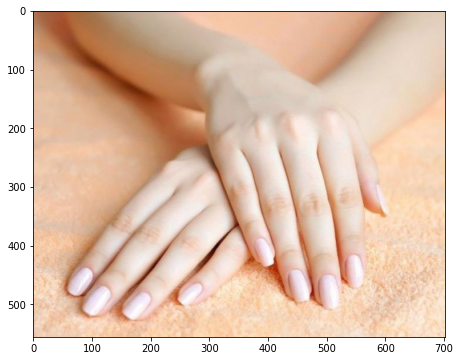

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('nails/images/2C29D473-CCB4-458C-926B-99D0042161E6.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()



In [ ]:
# Install tree first
!apt-get -q install tree
!tree nails

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
nails
├── images
│   ├── 09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg
│   ├── 1eecab90-1a92-43a7-b952-0204384e1fae.jpg
│   ├── 2C29D473-CCB4-458C-926B-99D0042161E6.jpg
│   ├── 2c376c66-9823-4874-869e-1e7f5c54ec7b.jpg
│   ├── 34404E67-4BB8-432E-863E-C1BEF5EB37E0.jpg
│   ├── 3493127D-7B19-4E50-94AE-2401BD2A91C8.jpg
│   ├── 41d83dbb-7c39-4d91-979e-eec5ff71b265.jpg
│   ├── 4252e46c-e40f-4543-91ab-031917d46c5c.jpg
│   ├── 4c46b91a-e402-11e8-97db-0242ac1c0002.jpg
│   ├── 4c472e18-e402-11e8-97db-0242ac1c0002.jpg
│   ├── 4c478f3e-e402-11e8-97db-0242ac1c0002.jpg
│   ├── 4c47ee66-e402-11e8-97db-0242ac1c0002.jpg
│   ├── 4c484f8c-e402-11e8-97db-0242ac1

In [ ]:
# !rmdir nails/ -f

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'nails'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('background','nails')
palette = [[0, 0, 0], [225, 25, 38]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.jpg'):
  seg_img = Image.open(osp.join(data_root, ann_dir, file)).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.jpg', 
                                                         '.png')))


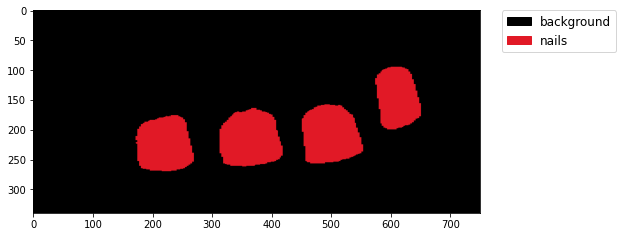

In [ ]:


# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('/content/mmsegmentation/nails/labels/09aefeec-e05f-11e8-87a6-0242ac1c0002.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()



In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*0.85)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])



In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class NailsDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r101-d8_512x1024_80k_cityscapes.py ')
print(cfg.dataset_type)
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_769x769_40k_cityscapes/pspnet_r50-d8_769x769_40k_cityscapes_20200606_112725-86638686.pth -P checkpoints

CityscapesDataset


In [ ]:
from mmseg.apis import set_random_seed

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2

# cfg.model.decode_head.loss_decode=dict(
#             type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0, avg_non_ignore=True)
# cfg.model.auxiliary_head.loss_decode.loss_decode=dict(
#             type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0, avg_non_ignore=True)

# cfg.model.decode_head.loss_decode==dict(
#             type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0,
#             # DeepLab used this class weight for cityscapes
#             class_weight=[1., 5.])
# cfg.model.decode_head.sampler=dict(type='OHEMPixelSampler', thresh=0.7, min_kept=100000)

cfg.model.decode_head.loss_decode=[dict(type='CrossEntropyLoss', loss_name='loss_ce', loss_weight=0.5),
            dict(type='DiceLoss', loss_name='loss_dice', loss_weight=0.5)]

cfg.model.auxiliary_head.loss_decode=[dict(type='CrossEntropyLoss', loss_name='loss_ce',loss_weight=0.5),
            dict(type='DiceLoss', loss_name='loss_dice', loss_weight=0.5)]

# Modify dataset type and path
cfg.dataset_type = 'NailsDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu = 8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5), # 
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


# cfg.optimizer=dict(
#     paramwise_cfg = dict(
#         custom_keys={
#             'head': dict(lr_mult=10.)}))

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/deeplabv3plus_r101-d8_512x1024_80k_cityscapes_20200605_094614-3769eecf.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/nails'
# bc of only one GPU
cfg.optimizer.lr = 0.01 / 8

cfg.runner.max_iters = 600
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# Set seed to facitate reproducing the result
cfg.seed = 1111
set_random_seed(1111, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        c1_in_channels=256,
        c1_channels=48,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='CrossEntropyLoss', loss_name='loss_ce', loss_weight=0.5),
            dict(type='DiceLoss', loss_name='loss_dice', loss_weigh

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-05-16 13:18:52,042 - mmseg - INFO - Loaded 44 images
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, low

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 3.9 task/s, elapsed: 2s, ETA:     0s

2022-05-16 13:29:01,418 - mmseg - INFO - per class results:
2022-05-16 13:29:01,421 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 98.44 | 99.28 |
|   nails    | 71.95 | 82.46 |
+------------+-------+-------+
2022-05-16 13:29:01,425 - mmseg - INFO - Summary:
2022-05-16 13:29:01,429 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 98.5 | 85.19 | 90.87 |
+------+-------+-------+
2022-05-16 13:29:01,432 - mmseg - INFO - Iter(val) [8]	aAcc: 0.9850, mIoU: 0.8519, mAcc: 0.9087, IoU.background: 0.9844, IoU.nails: 0.7195, Acc.background: 0.9928, Acc.nails: 0.8246
2022-05-16 13:29:31,453 - mmseg - INFO - Iter [210/600]	lr: 8.822e-04, eta: 0:19:42, time: 3.208, data_time: 0.815, memory: 5894, decode.loss_ce: 0.0296, decode.loss_dice: 0.1284, decode.acc_seg: 98.2207, aux.loss_ce: 0.0327, aux.loss_dice: 0.1330, aux.acc_seg: 98.1590, loss: 0.3237
2022-05-16 13:30:01,692 - mms

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 5.5 task/s, elapsed: 1s, ETA:     0s

2022-05-16 13:39:08,121 - mmseg - INFO - per class results:
2022-05-16 13:39:08,123 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 98.79 | 99.58 |
|   nails    | 77.05 | 83.61 |
+------------+-------+-------+
2022-05-16 13:39:08,125 - mmseg - INFO - Summary:
2022-05-16 13:39:08,131 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 98.83 | 87.92 | 91.59 |
+-------+-------+-------+
2022-05-16 13:39:08,133 - mmseg - INFO - Iter(val) [8]	aAcc: 0.9883, mIoU: 0.8792, mAcc: 0.9159, IoU.background: 0.9879, IoU.nails: 0.7705, Acc.background: 0.9958, Acc.nails: 0.8361
2022-05-16 13:39:38,196 - mmseg - INFO - Iter [410/600]	lr: 5.105e-04, eta: 0:09:36, time: 3.157, data_time: 0.768, memory: 5894, decode.loss_ce: 0.0183, decode.loss_dice: 0.1331, decode.acc_seg: 98.7918, aux.loss_ce: 0.0207, aux.loss_dice: 0.1361, aux.acc_seg: 98.6841, loss: 0.3082
2022-05-16 13:40:08,284 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 5.6 task/s, elapsed: 1s, ETA:     0s

2022-05-16 13:49:12,793 - mmseg - INFO - per class results:
2022-05-16 13:49:12,794 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 98.79 | 99.47 |
|   nails    | 77.61 | 86.04 |
+------------+-------+-------+
2022-05-16 13:49:12,800 - mmseg - INFO - Summary:
2022-05-16 13:49:12,802 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 98.84 | 88.2 | 92.75 |
+-------+------+-------+
2022-05-16 13:49:12,807 - mmseg - INFO - Iter(val) [8]	aAcc: 0.9884, mIoU: 0.8820, mAcc: 0.9275, IoU.background: 0.9879, IoU.nails: 0.7761, Acc.background: 0.9947, Acc.nails: 0.8604


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

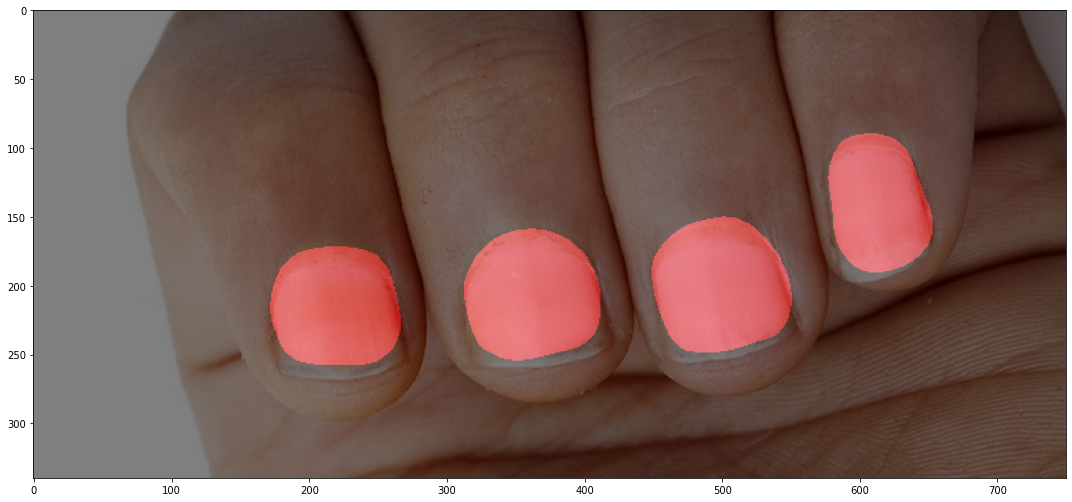

In [ ]:
img = mmcv.imread('/content/mmsegmentation/nails/images/09aefeec-e05f-11e8-87a6-0242ac1c0002.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

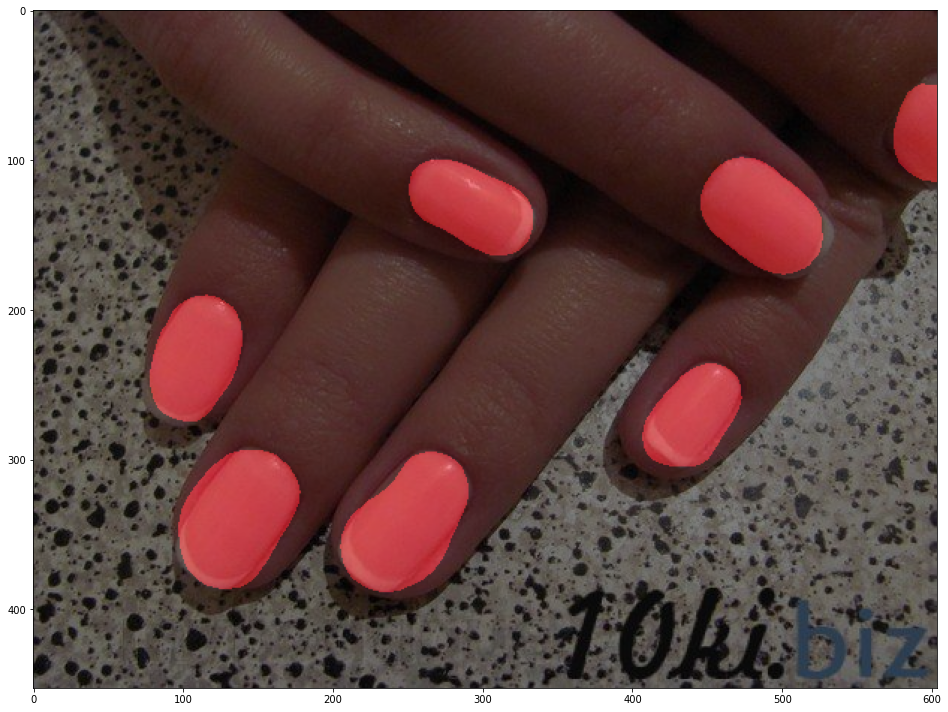

In [ ]:
img = mmcv.imread('/content/mmsegmentation/nails/nails_segmentation/images/d62b0cd8-db67-11e8-9658-0242ac1c0002.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

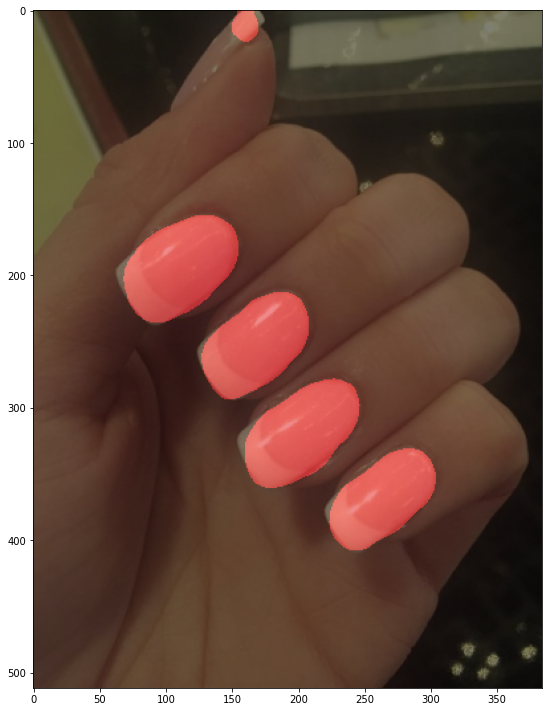

In [ ]:
img = mmcv.imread('/content/mmsegmentation/nails/nails_segmentation/images/1eecab90-1a92-43a7-b952-0204384e1fae.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)